In [1]:
import pandas as pd
pd.set_option('display.max_columns', 150)
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load data

In [2]:
raw_data = pd.read_csv("../../data/raw/listings.csv")
print(raw_data.shape)
raw_data.head(3)

(38277, 74)


/var/folders/04/_gk1mt7s6yn55gmy80r1kh8r0000gn/T/ipykernel_4253/1847244859.py:1: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("../../data/raw/listings.csv")


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,80%,17%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,8.0,8.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,3,33,63,338,2021-12-05,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,a few days or more,9%,69%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",$75.00,1,730,1.0,1.0,730.0,730.0,1.0,730.0,NaN,t,3,6,18,194,2021-12-05,409,32,0,2015-01-05,2021-10-22,4.45,4.58,4.49,4.78,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Wifi"",...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365

# Exploratory data analysis

In [3]:
raw_data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

## Missing values

In [4]:
raw_data.isna().sum().to_frame().merge(round((raw_data.isna().sum() / len(raw_data))*100, 2).to_frame(),
                                   left_index=True, right_index=True, how='outer' ).\
    rename(columns={'0_x':'N_NAN', '0_y':'PERCENTAGE_NAN'}).\
    sort_values(['PERCENTAGE_NAN','N_NAN'], ascending=False)

,N_NAN,PERCENTAGE_NAN
bathrooms,38277,100.00
calendar_updated,38277,100.00
license,38276,100.00
host_response_time,17193,44.92
host_response_rate,17193,44.92
host_acceptance_rate,16486,43.07
host_about,16149,42.19
neighborhood_overview,15627,40.83
neighbourhood,15626,40.82
review_scores_value,10127,26.46


`bathrooms`, `calendar_updated` and `license` are empty (or mostly empty) columns, which makes them non-informative.

## Columns with a unique value

In [5]:
raw_data.nunique(dropna=False)

id                                              38277
listing_url                                     38277
scrape_id                                           1
last_scraped                                        2
name                                            36871
description                                     34134
neighborhood_overview                           18617
picture_url                                     37148
host_id                                         25904
host_url                                        25904
host_name                                        9124
host_since                                       4290
host_location                                    1748
host_about                                      14424
host_response_time                                  5
host_response_rate                                 89
host_acceptance_rate                              102
host_is_superhost                                   3
host_thumbnail_url          

- Every row in raw_data has the same `scrape_id` so this columns does not provide any value.
- Columns `id` and `listing_url` don't have duplicates.

## Columns subset

To adjust to the expected input for the API we are going to select a subset of the columns.

In [6]:
data = raw_data[['id','accommodates','room_type','beds','bedrooms','bathrooms_text','neighbourhood_group_cleansed','amenities','latitude','longitude','price']].copy()

## Univariate analysis

### Price / target

In [7]:
data.price.str.startswith('$').all(), data.price.str.endswith('.00').all()

(True, True)

Since all values starts with '$' and have no decimals we can remove this parts and convert the column type to integer.

In [8]:
data['price_processed'] = data.price.str[1:-3].str.replace(',','').astype(int)

In [9]:
data.price_processed.describe()

count    38277.000000
mean       170.858714
std        305.100271
min          0.000000
25%         70.000000
50%        114.000000
75%        189.000000
max      10000.000000
Name: price_processed, dtype: float64

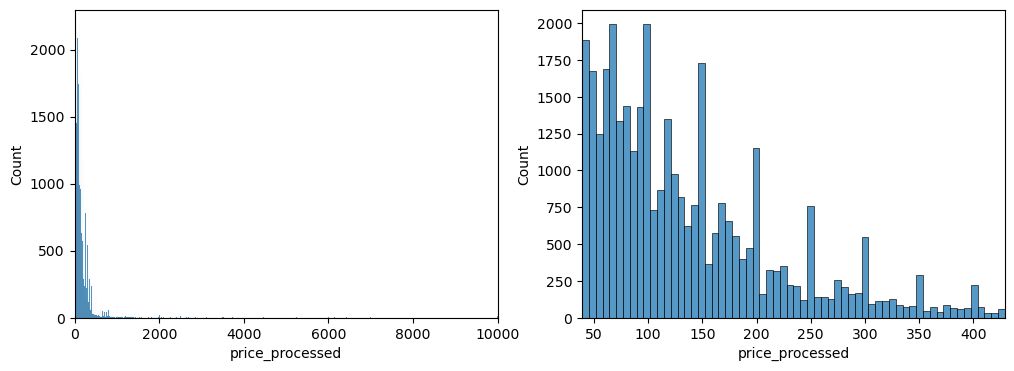

In [10]:
# Plot price distribution

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot(data.price_processed, ax=axs[0]).autoscale(enable=True, axis='x', tight=True)
q5, q95 = data.price_processed.quantile([0.05,0.95]).values
sns.histplot(data[ (data.price_processed>=q5) & (data.price_processed<=q95) ]['price_processed'], ax=axs[1]).autoscale(enable=True, axis='x', tight=True)

The price distribution is right skewed. 95% of all values are below $450.

In [11]:
data.drop(columns=['price'], inplace=True)
data.rename(columns={'price_processed':'price'}, inplace=True)

### accommodates

It refers to the amount of people that the house can accommodate.

In [12]:
data.accommodates.value_counts()

2     17486
1      6579
4      5863
3      3695
6      1738
5      1514
8       515
7       345
10      178
16      118
12       98
9        57
11       26
0        21
13       18
14       15
15       11
Name: accommodates, dtype: int64

In [13]:
data.accommodates.describe()

count    38277.000000
mean         2.792094
std          1.869736
min          0.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

### room_type

In [14]:
data.room_type.value_counts(dropna=False)

Entire home/apt    20397
Private room       17098
Shared room          572
Hotel room           210
Name: room_type, dtype: int64

### beds

In [15]:
data.beds.value_counts(dropna=False)

1.0     23132
2.0      7932
3.0      2801
NaN      2405
4.0      1196
5.0       408
6.0       208
7.0        82
8.0        48
9.0        22
12.0       13
10.0       12
11.0        7
16.0        4
13.0        3
24.0        1
18.0        1
21.0        1
17.0        1
Name: beds, dtype: int64

### bedrooms

In [16]:
data.bedrooms.value_counts(dropna=False)

1.0     26531
2.0      5371
NaN      3975
3.0      1761
4.0       474
5.0       108
6.0        32
8.0         9
7.0         8
9.0         3
10.0        1
11.0        1
13.0        1
12.0        1
16.0        1
Name: bedrooms, dtype: int64

### bathrooms_text

We have to extract the number of bathrooms from this column.

In [17]:
data.bathrooms_text.value_counts(dropna=False)

1 bath               19697
1 shared bath         9497
1 private bath        2758
2 baths               2201
2 shared baths        1128
1.5 baths             1039
1.5 shared baths       713
2.5 baths              307
3 baths                185
0 shared baths         142
NaN                    107
2.5 shared baths        98
3 shared baths          94
3.5 baths               79
4 baths                 58
0 baths                 43
Half-bath               40
4.5 baths               21
Shared half-bath        15
4 shared baths          11
Private half-bath       11
5 baths                 11
5.5 baths                5
6 baths                  5
8 baths                  3
3.5 shared baths         2
7.5 baths                2
6 shared baths           2
4.5 shared baths         1
6.5 baths                1
7 baths                  1
Name: bathrooms_text, dtype: int64

A half-bath is a small bathroom that typically only includes a sink and a toilet, but no shower or bathtub. We could consider this as a quantity of 0.5 baths.

In [18]:
def extract_num_baths(text):
    found_groups = [group for group in re.findall("(\d*\.?\d*).*", str(text)) if group!='']
    if found_groups:
        return float(found_groups[0])
    elif pd.isna(text) or text is None:
        return np.nan
    # Special cases
    elif "half-bath" in text.lower():
        return 0.5
    else:  # In case there were any cases like this
        return 1

In [19]:
data['bathrooms'] = data.bathrooms_text.apply(extract_num_baths)
data.bathrooms.describe()

count    38170.000000
mean         1.151585
std          0.436290
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: bathrooms, dtype: float64

In [20]:
data.bathrooms.value_counts(dropna=False)

1.0    31952
2.0     3329
1.5     1752
2.5      405
3.0      279
0.0      185
NaN      107
3.5       81
4.0       69
0.5       66
4.5       22
5.0       11
6.0        7
5.5        5
8.0        3
7.5        2
6.5        1
7.0        1
Name: bathrooms, dtype: int64

In [21]:
data.drop(columns=['bathrooms_text'], inplace=True)

### neighbourhood_group_cleansed

It seems to represent the most popular parts of New York where house can be grouped.

In [22]:
raw_data.neighbourhood_group_cleansed.value_counts(dropna=False)

Manhattan        16781
Brooklyn         14716
Queens            5323
Bronx             1104
Staten Island      353
Name: neighbourhood_group_cleansed, dtype: int64

If we were interested in more detailed information we could also be extract the neighbourhood from the column `neighbourhood`.

#### neighbourhood

In [23]:
raw_data.neighbourhood.value_counts(dropna=False).head(10)

NaN                                          15626
New York, United States                       9301
Brooklyn, New York, United States             8696
Queens, New York, United States               2840
Bronx, New York, United States                 387
Brooklyn , New York, United States             264
The Bronx, New York, United States             239
Staten Island, New York, United States         212
Astoria, New York, United States                56
Long Island City, New York, United States       46
Name: neighbourhood, dtype: int64

In [24]:
raw_data.neighbourhood.value_counts(dropna=False).tail()

Jamaica , ny, United States                   1
 Crown Heights,NY, New York, United States    1
Corona , New York, United States              1
Flush, New York, United States                1
Yonkers, New York, United States              1
Name: neighbourhood, dtype: int64

In [25]:
raw_data.neighbourhood.str.split(', ').str[-1].value_counts(dropna=False)

United States    22649
NaN              15626
Argentina            1
France               1
Name: neighbourhood, dtype: int64

It's probable that these values can be manually written. For example, the houses from Argentina and France are obvious errors.

In [26]:
raw_data.neighbourhood.str.split(', ').str[0].value_counts(dropna=False)

NaN                            15626
New York                        9306
Brooklyn                        8699
Queens                          2843
Bronx                            388
Brooklyn                         265
The Bronx                        239
Staten Island                    212
Astoria                           59
Long Island City                  47
Flushing                          36
Manhattan                         27
Bronx                             26
Woodside                          23
New York                          19
Flushing                          18
Queens                            17
Astoria                           17
NEW YORK                          16
Elmhurst                          13
New York City                     13
Jamaica                           11
Ridgewood                         11
Elmhurst                          10
Sunnyside                         10
Staten Island                     10
East Elmhurst                      9
b

In [27]:
raw_data['specific_neighbourhood'] = raw_data.neighbourhood.str.split(', ').str[0]
raw_data.groupby('specific_neighbourhood')['neighbourhood_group_cleansed'].unique()

specific_neighbourhood
 Astoria                                                                [Queens]
 Crown Heights,NY                                                     [Brooklyn]
 East Elmhurst                                                          [Queens]
 Forest Hills                                                           [Queens]
 Springfield Gardens                                                    [Queens]
8425 Elmhurst avenue                                                    [Queens]
ASTORIA                                                                 [Queens]
Arverne                                                                 [Queens]
Astoria                                                                 [Queens]
Astoria                                                                 [Queens]
Astoria Queens                                                          [Queens]
Astoria Queens                                                          [Queens]
BROOK

In [28]:
data.rename(columns={'neighbourhood_group_cleansed':'neighbourhood'}, inplace=True)

### amenities

We are only interested in TV, elevator and internet.

In [29]:
data.amenities.head()

0    ["Extra pillows and blankets", "Baking sheet",...
1    ["Extra pillows and blankets", "Luggage dropof...
2    ["Kitchen", "Long term stays allowed", "Wifi",...
3    ["Kitchen", "BBQ grill", "Cable TV", "Carbon m...
4    ["Room-darkening shades", "Lock on bedroom doo...
Name: amenities, dtype: object

In [30]:
data.amenities.str.lower().str.contains('wifi').sum()

37303

In [31]:
data.amenities.str.lower().str.contains('tv').sum()

27882

In [32]:
data.amenities.str.lower().str.contains('elevator').sum()

9100

In [33]:
def find_amenities(lst):
    return pd.Series([int('tv' in lst.lower()), int('elevator' in lst.lower()), int('wifi' in lst.lower())])

In [34]:
data[['tv','elevator','internet']] = data.amenities.apply(find_amenities)

In [35]:
data[['tv','elevator','internet']].sum()

tv          27882
elevator     9100
internet    37303
dtype: int64

In [36]:
data.drop(columns=['amenities'], inplace=True)

### latitude

In [37]:
data.latitude.describe()

count    38277.000000
mean        40.729206
std          0.055752
min         40.504560
25%         40.689260
50%         40.725180
75%         40.762680
max         40.914020
Name: latitude, dtype: float64

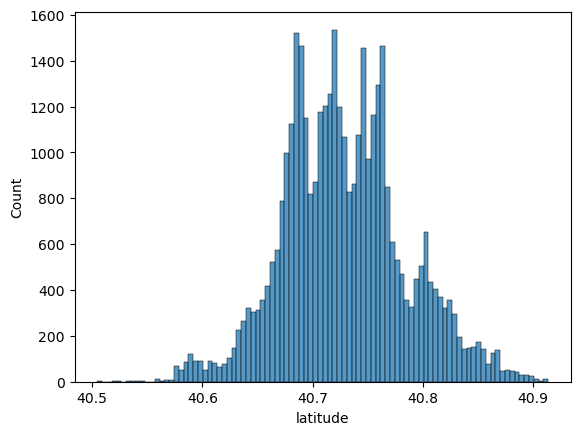

In [38]:
sns.histplot(data.latitude);

### longitude

In [39]:
data.longitude.describe()

count    38277.000000
mean       -73.948967
std          0.050759
min        -74.249840
25%        -73.983270
50%        -73.954770
75%        -73.930430
max        -73.710870
Name: longitude, dtype: float64

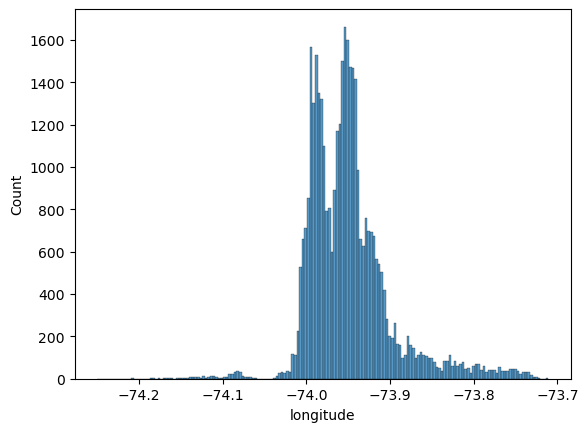

In [40]:
sns.histplot(data.longitude);

In [41]:
data.sample(3)

,id,accommodates,room_type,beds,bedrooms,neighbourhood,latitude,longitude,price,bathrooms,tv,elevator,internet
27265,44613638,1,Private room,1.0,1.0,Manhattan,40.82598,-73.94374,50,1.0,1,0,1
17217,27314650,2,Private room,1.0,1.0,Queens,40.75770,-73.81925,95,1.0,0,0,1
34703,51955986,2,Private room,1.0,1.0,Brooklyn,40.69264,-73.91171,54,1.0,1,0,1


## Multivariate analysis

In [42]:
data.corr(numeric_only=True).style.background_gradient('bwr', vmin=-1, vmax=1)

,id,accommodates,beds,bedrooms,latitude,longitude,price,bathrooms,tv,elevator,internet
id,1.000000,0.035401,0.034231,0.047429,0.010001,0.087080,0.042559,0.051039,0.070294,-0.071167,0.005100
accommodates,0.035401,1.000000,0.766824,0.733944,-0.047451,0.003738,0.308026,0.365709,0.206021,-0.014543,0.024445
beds,0.034231,0.766824,1.000000,0.760881,-0.055936,0.032408,0.241752,0.400439,0.166299,-0.062732,0.013289
bedrooms,0.047429,0.733944,0.760881,1.000000,-0.074426,0.007866,0.261992,0.476334,0.145083,-0.063660,0.014403
latitude,0.010001,-0.047451,-0.055936,-0.074426,1.000000,0.057180,0.027341,-0.041971,0.035750,0.184387,-0.014624
longitude,0.087080,0.003738,0.032408,0.007866,0.057180,1.000000,-0.114842,-0.001286,-0.035962,-0.182266,-0.001514
price,0.042559,0.308026,0.241752,0.261992,0.027341,-0.114842,1.000000,0.216024,0.114454,0.096208,-0.009919
bathrooms,0.051039,0.365709,0.400439,0.476334,-0.041971,-0.001286,0.216024,1.000000,0.051700,-0.022859,0.039010
tv,0.070294,0.206021,0.166299,0.145083,0.035750,-0.035962,0.114454,0.051700,1.000000,0.087386,0.140058
elevator,-0.071167,-0.014543,-0.062732,-0.063660,0.184387,-0.182266,0.096208,-0.022859,0.087386,1.000000,0.005674


`accommodates`, `beds` and `bedrooms` are very correlated. For an approach that involves a linear model we should discard two of them to avoid multicollinearity.

In [43]:
data.isna().sum()

id                  0
accommodates        0
room_type           0
beds             2405
bedrooms         3975
neighbourhood       0
latitude            0
longitude           0
price               0
bathrooms         107
tv                  0
elevator            0
internet            0
dtype: int64

In [44]:
(data.bedrooms.isna() & data.bathrooms.isna()).sum()

42

In [45]:
data.groupby('bedrooms').agg({'bathrooms':['mean','median',pd.Series.mode]})

bathrooms                        
              mean median             mode
bedrooms                                  
1.0       1.090615    1.0              1.0
2.0       1.239009    1.0              1.0
3.0       1.641681    1.5              1.0
4.0       2.234177    2.0              2.0
5.0       2.787037    2.5              2.0
6.0       3.312500    3.0              2.0
7.0       4.187500    4.0              4.0
8.0       4.833333    4.0              4.0
9.0       5.500000    6.0  [4.0, 6.0, 6.5]
10.0      6.000000    6.0              6.0
11.0      2.000000    2.0              2.0
12.0      5.000000    5.0              5.0
13.0      7.500000    7.5              7.5
16.0      1.000000    1.0              1.0

In [46]:
data.groupby('accommodates').agg({'bathrooms':['mean','median']})

bathrooms       
                  mean median
accommodates                 
0                  NaN    NaN
1             1.122007    1.0
2             1.082607    1.0
3             1.051598    1.0
4             1.138803    1.0
5             1.294974    1.0
6             1.474928    1.0
7             1.588406    1.5
8             1.787379    2.0
9             2.070175    2.0
10            2.058989    2.0
11            1.961538    2.0
12            2.520408    2.0
13            2.111111    2.0
14            3.166667    3.0
15            1.954545    2.0
16            2.517094    2.0

We can use the median number of bathrooms by number of bedrooms to impute missing values in `bathrooms`. For cases where `bedrooms` is also NaN we can use `accommodates` and use the median number of bathrooms as well.

## Multivariate analysis

### Listings spatial distribution in New York

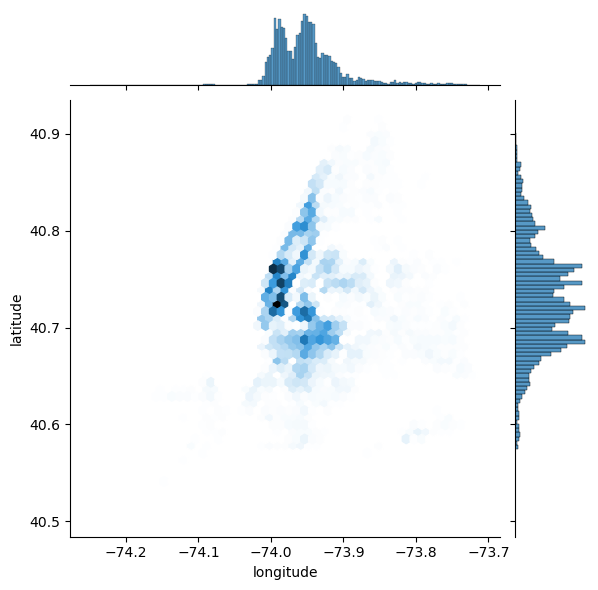

In [47]:
sns.jointplot(data, x='longitude', y='latitude', kind='hex');

In [48]:
data.loc[data.price==0, 'room_type'].value_counts()

Hotel room    36
Name: room_type, dtype: int64

It's interesting that all listings with price equals 0 are hotel rooms. It's possible that the post includes a link to the actual website where we can book the accommodation.

In [49]:
data.groupby('accommodates').agg({'price':['count','mean','median','min','max']})

price                                
              count         mean median  min    max
accommodates                                       
0                21     0.000000    0.0    0      0
1              6579    85.035872   60.0   10  10000
2             17486   137.490049   99.0    0  10000
3              3695   164.631394  135.0   22   3500
4              5863   228.120246  165.0    0  10000
5              1514   253.144650  199.0    0   6143
6              1738   309.179517  226.0    0   6000
7               345   374.573913  257.0   60   6500
8               515   405.648544  299.0   50   2500
9                57   577.631579  349.0  107   3000
10              178   555.696629  377.0   49   3557
11               26   462.115385  357.0  122   1236
12               98   700.561224  500.0   54   3119
13               18   632.055556  513.0  198   1600
14               15   695.800000  550.0   82   1950
15               11   773.545455  610.0  274   1981
16              118  1093.144068  756.5   66   5250

### Analysis of the proportion of houses by price bin for each number of accommodates

We could define 4 bins for the price based on the quantiles 33, 66 and 95.

In [86]:
quantiles = data.price.quantile([0.33, 0.66, 0.95]).values
bins = np.append( np.insert(quantiles, 0, 0), data.price.max() )
data['price_binarized'] = pd.cut(data.price, bins, include_lowest=True, labels=['Low','Mid','High','Luxury'])

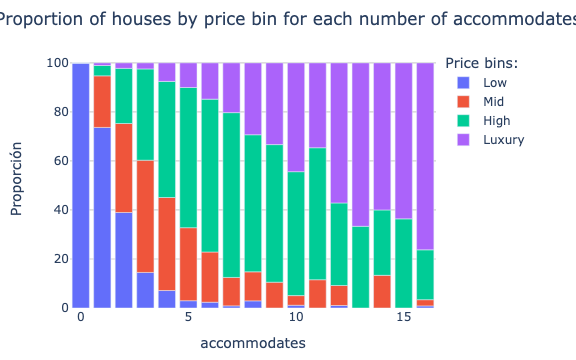

In [96]:
df = data.groupby(['accommodates','price_binarized'])['id'].count().reset_index().rename(columns={'id':'Count'})
df['Sort_col'] = df['price_binarized'].apply(lambda bbin : {'Low':1,'Mid':2,'High':3,'Luxury':4}[bbin])
df.sort_values(['accommodates','Sort_col'], inplace=True)

fig = px.bar(df, x="accommodates", y="Count", color="price_binarized", hover_data={'accommodates':False, 'price_binarized':False}, labels={"Count": "Proporción"})
fig.update_layout(plot_bgcolor='white',
                  hovermode="closest",
                  legend={'title_text':'Price bins:'},
                  title={'text': 'Proportion of houses by price bin for each number of accommodates', 'x': 0.5},
                  margin={'l':70, 'r':140, 't':50, 'b':50},
                  barnorm='percent')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True, gridwidth=1.2, gridcolor='#d1d1d1')
fig.show()

We get the expected result. As the number of accommodates get bigger the proportion of low prices decreases and the high and luxury prices increase. We could group together the values in the ranges 8-11 and 12-16 if we were to define categories for this variable.

### Analysis of the proportion of houses by price bin for each number of bathrooms

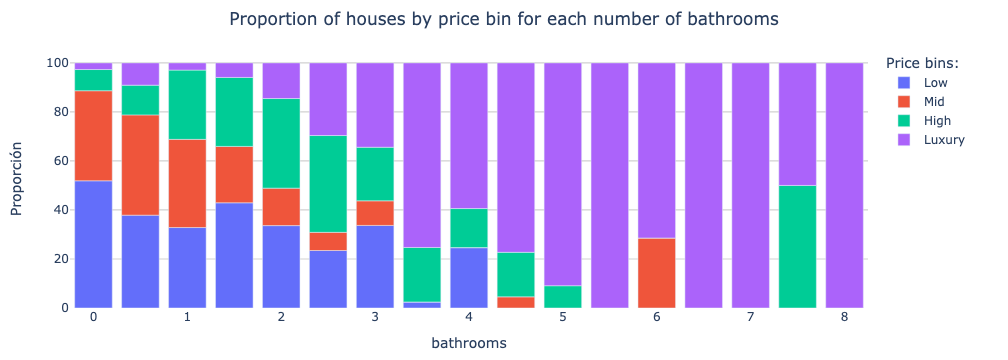

In [99]:
df = data.groupby(['bathrooms','price_binarized'])['id'].count().reset_index().rename(columns={'id':'Count'})
df['Sort_col'] = df['price_binarized'].apply(lambda bbin : {'Low':1,'Mid':2,'High':3,'Luxury':4}[bbin])
df.sort_values(['bathrooms','Sort_col'], inplace=True)

fig = px.bar(df, x="bathrooms", y="Count", color="price_binarized", hover_data={'bathrooms':False, 'price_binarized':False}, labels={"Count": "Proporción"})
fig.update_layout(plot_bgcolor='white',
                  hovermode="closest",
                  legend={'title_text':'Price bins:'},
                  title={'text': 'Proportion of houses by price bin for each number of bathrooms', 'x': 0.5},
                  margin={'l':70, 'r':140, 't':50, 'b':50},
                  barnorm='percent')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True, gridwidth=1.2, gridcolor='#d1d1d1')
fig.show()

After repeating the same procedure with the number of bathrooms, it could be reasonable to group together the values greater than 4 in the same category.

### Relationship between price and neighbourhood

In [116]:
data.groupby('neighbourhood').agg({'price':['mean','median','count']})

price              
                     mean median  count
neighbourhood                          
Bronx          106.381341   75.0   1104
Brooklyn       136.775007   99.0  14716
Manhattan      222.681902  150.0  16781
Queens         118.773248   77.0   5323
Staten Island  115.235127   88.0    353

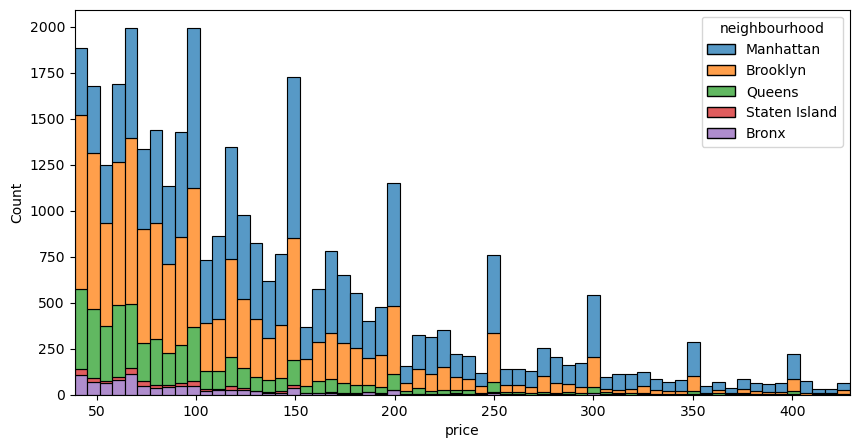

In [109]:
q5, q95 = data.price.quantile([0.05,0.95]).values
_, ax = plt.subplots(figsize=(10,5))
sns.histplot(data[(data.price>=q5) & (data.price<=q95)], x='price', hue='neighbourhood', multiple='stack').autoscale(enable=True, axis='x', tight=True);

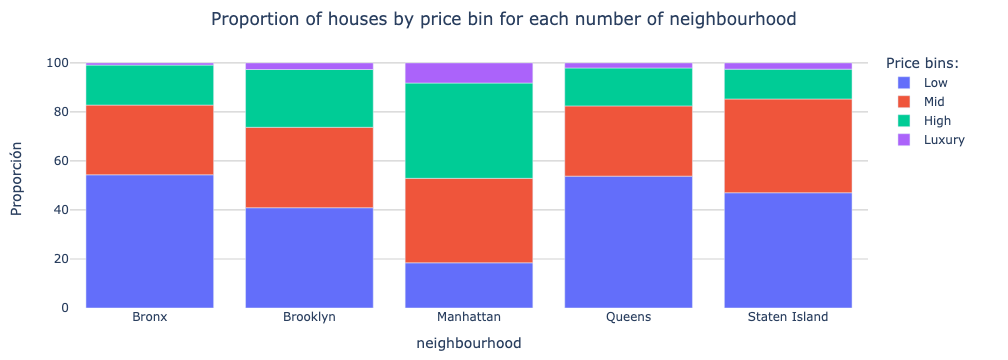

In [110]:
df = data.groupby(['neighbourhood','price_binarized'])['id'].count().reset_index().rename(columns={'id':'Count'})
df['Sort_col'] = df['price_binarized'].apply(lambda bbin : {'Low':1,'Mid':2,'High':3,'Luxury':4}[bbin])
df.sort_values(['neighbourhood','Sort_col'], inplace=True)

fig = px.bar(df, x="neighbourhood", y="Count", color="price_binarized", hover_data={'neighbourhood':False, 'price_binarized':False}, labels={"Count": "Proporción"})
fig.update_layout(plot_bgcolor='white',
                  hovermode="closest",
                  legend={'title_text':'Price bins:'},
                  title={'text': 'Proportion of houses by price bin for each number of neighbourhood', 'x': 0.5},
                  margin={'l':70, 'r':140, 't':50, 'b':50},
                  barnorm='percent')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True, gridwidth=1.2, gridcolor='#d1d1d1')
fig.show()

The proportion of houses of each price bin is quite similar in every neighbourhood, only in Manhattan half of the listings have a high or luxury price. We could group together neighbourhoods Bronx, Queens and Staten Island because of this analysis and the fact that they are the least frequent neighbourhood in our data.

### Relationship between price and room_type

In [115]:
data.groupby('room_type').agg({'price':['mean','median','count']})

price              
                       mean median  count
room_type                                
Entire home/apt  220.462813  160.0  20397
Hotel room       381.138095  277.5    210
Private room     109.655632   70.0  17098
Shared room      154.279720   55.0    572

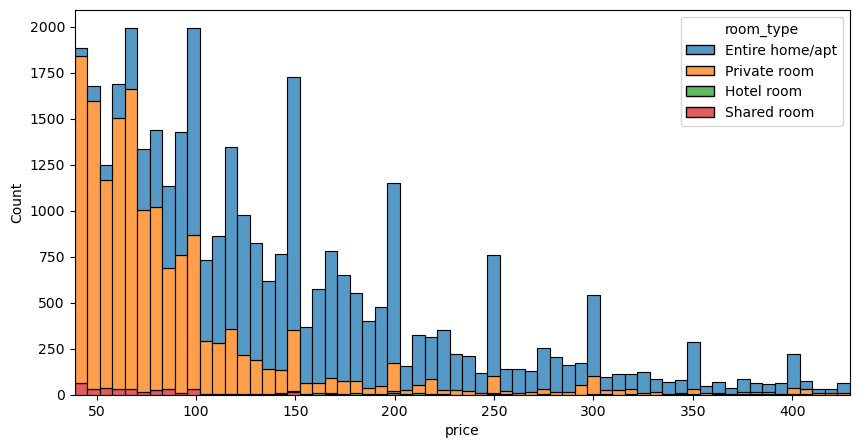

In [111]:
q5, q95 = data.price.quantile([0.05,0.95]).values
_, ax = plt.subplots(figsize=(10,5))
sns.histplot(data[(data.price>=q5) & (data.price<=q95)], x='price', hue='room_type', multiple='stack').autoscale(enable=True, axis='x', tight=True);

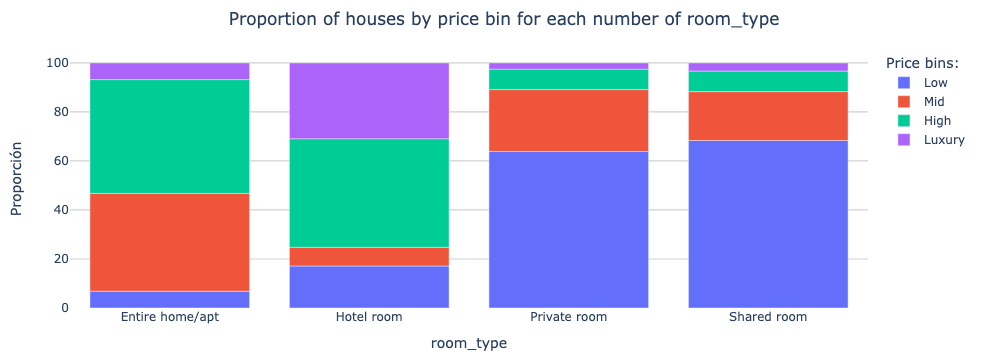

In [112]:
df = data.groupby(['room_type','price_binarized'])['id'].count().reset_index().rename(columns={'id':'Count'})
df['Sort_col'] = df['price_binarized'].apply(lambda bbin : {'Low':1,'Mid':2,'High':3,'Luxury':4}[bbin])
df.sort_values(['room_type','Sort_col'], inplace=True)

fig = px.bar(df, x="room_type", y="Count", color="price_binarized", hover_data={'room_type':False, 'price_binarized':False}, labels={"Count": "Proporción"})
fig.update_layout(plot_bgcolor='white',
                  hovermode="closest",
                  legend={'title_text':'Price bins:'},
                  title={'text': 'Proportion of houses by price bin for each number of room_type', 'x': 0.5},
                  margin={'l':70, 'r':140, 't':50, 'b':50},
                  barnorm='percent')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True, gridwidth=1.2, gridcolor='#d1d1d1')
fig.show()

Categories "Private room" and "Shared room" are quite similar in terms of the proportion of houses by price bin. We could also group these categories.